# Cleaning Data with Pandas Exercises

For the exercises, you will be cleaning data in the Women's Clothing E-Commerce Reviews dataset.

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [13]:
# Import pandas and any other libraries you need here.
import pandas as pd
import numpy as np
import matplotlib as plt
# Create a new dataframe from your CSV
womens_clothing_ecommerce = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [14]:
# Print out any information you need to understand your dataframe
print(womens_clothing_ecommerce.info())
print(womens_clothing_ecommerce.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080 

## Missing Data

Try out different methods to locate and resolve missing data.

In [15]:
# Try to find some missing data!
print(womens_clothing_ecommerce.info())
# found some nulls
# some nulls are in the title and text columns, which won't be useful.  So, I will drop these columns.
wce_cleaned = womens_clothing_ecommerce.drop(columns=["Title", "Review Text"])
# the rest of the nulls are for the division, department, and class columns.
# As these are the only ways we have of telling what exactly the item is, if we are missing all these
# values, we won't be able to draw any conclusions from the information in that row.
wce_cleaned = wce_cleaned.dropna(subset = ["Division Name", "Department Name", "Class Name"], how= "all")
print(wce_cleaned.info())
# We have now eliminated null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 23472 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count

Did you find any missing data? What things worked well for you and what did not?

In [ ]:
# Respond to the above questions here:
# Yes, a few thousand nulls in the "Title" column, as well as several hundred each in 
# the text, division, department, and class names.
# For larger datasets, .info() gives a quick overview of null values in each colunm
# by comparing the non-null count for each column to the total number of rows.


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers.

count    23472.000000
mean         4.195552
std          1.110188
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

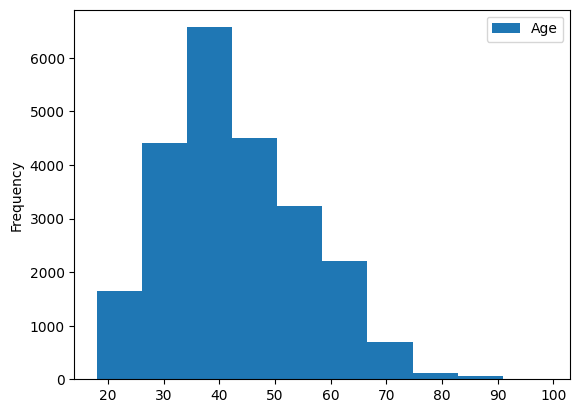

In [16]:
# Keep an eye out for outliers!
wce_cleaned["Age"].describe()
# Min age 18 (possibly min age required to have an account), max 99.  While unlikely there
# is a 99 year-old leaving online product reviews, not impossible.
wce_cleaned.plot.hist(column="Age")
#Appears to be a standard age curve.
wce_cleaned["Rating"].describe()
# Min 1, max 5.  Nothing to see here.


What techniques helped you find outliers? In your opinion, what about the techniques you used made them effective?

In [ ]:
# Make your notes here:
# No obvious outliers found by looking at age range and curve, ratings.

## Unnecessary Data

Unnecessary data could be irrelevant to your analysis or a duplice column. Check out the dataset to see if there is any unnecessary data.

In [ ]:
# Look out for unnecessary data!
wce_cleaned["Unnamed: 0"].describe()
# This appears to be index numbers.  Dropping as they are already provided by the dataset.
wce_cleaned = wce_cleaned.drop(columns="Unnamed: 0")
wce_cleaned["Recommended IND"].info()
# This appears to be a boolean indicator of whether the reviewer recommends the product.
wce_cleaned["Positive Feedback Count"].info()
wce_cleaned["Positive Feedback Count"].describe()
# This appears to be number of "likes" on a review.  As this describes the review rather than
# the product, we'll remove it as unnecessary for gaining insight into the products themselves.
wce_cleaned = wce_cleaned.drop(columns=["Positive Feedback Count"])
print(wce_cleaned.head())


<class 'pandas.core.series.Series'>
Index: 23472 entries, 0 to 23485
Series name: Recommended IND
Non-Null Count  Dtype
--------------  -----
23472 non-null  int64
dtypes: int64(1)
memory usage: 366.8 KB
   Clothing ID  Age  Rating  Recommended IND   Division Name Department Name  \
0          767   33       4                1       Initmates        Intimate   
1         1080   34       5                1         General         Dresses   
2         1077   60       3                0         General         Dresses   
3         1049   50       5                1  General Petite         Bottoms   
4          847   47       5                1         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses  


Did you find any unnecessary data in your dataset? How did you handle it?

In [ ]:
print(wce_cleaned.head())
# Make your notes here.
# I already removed Title and Text previously.  The complexity of these user-generated
# values means that they are not easily sorted or analyzed in large quantities.
# I examined the other columns and decided to drop Positive Feedback Count, as it doesn't
# convey any information about the product itself, as well as "Unnamed: 0", as this was just
# a duplicatoin of the index values.


   Clothing ID  Age  Rating  Recommended IND   Division Name Department Name  \
0          767   33       4                1       Initmates        Intimate   
1         1080   34       5                1         General         Dresses   
2         1077   60       3                0         General         Dresses   
3         1049   50       5                1  General Petite         Bottoms   
4          847   47       5                1         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses  


## Inconsistent Data

Inconsistent data is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [32]:
# Look out for inconsistent data!
wce_cleaned[wce_cleaned["Age"] % 1 != 0]
# No non-integer ages detected.
wce_cleaned[~wce_cleaned["Rating"].isin([1, 2, 3, 4, 5])]
# Tried a few variations to be sure, but all review scores seem to be integers.
wce_cleaned[wce_cleaned["Recommended IND"] % 1 != 0]
# Boolean values all are either 1 or 0, but for readability we'll convert to T/F.
wce_cleaned['Recommended IND'] = wce_cleaned['Recommended IND'].astype('bool')
print(wce_cleaned.head())


   Clothing ID  Age  Rating  Recommended IND   Division Name Department Name  \
0          767   33       4             True       Initmates        Intimate   
1         1080   34       5             True         General         Dresses   
2         1077   60       3            False         General         Dresses   
3         1049   50       5             True  General Petite         Bottoms   
4          847   47       5             True         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses  


Did you find any inconsistent data? What did you do to clean it?

In [ ]:
# Make your notes here!
# Changed "Recommended IND" from int to bool